In [1]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [2]:
# Data points and labels
X = np.array([[2, 0], [0, 2], [3, 3], [0, 0], [-1, 0]])
y = np.array([1, 1, 1, -1, -1])

# Number of samples
n_samples, n_features = X.shape
C = 1.0  # Regularization parameter

In [3]:
### PRIMAL FORMULATION ###
# Minimize 1/2 ||w||^2 + C sum_i xi_i
P = matrix(np.eye(n_features + 1))
P[-1, -1] = 0.0  

q = matrix(np.zeros(n_features + 1))

G = np.zeros((n_samples, n_features + 1))
for i in range(n_samples):
    G[i, :-1] = -y[i] * X[i]  # -y * x_i
    G[i, -1] = -y[i]  # -y * b
G = matrix(G)

h = matrix(-np.ones(n_samples))

# Solve primal problem
sol = solvers.qp(P, q, G, h)

w_primal = np.array(sol['x'][:n_features])
b_primal = np.array(sol['x'][n_features])

print("Primal solution: w =", w_primal, "b =", b_primal)

     pcost       dcost       gap    pres   dres
 0:  8.8549e-02  4.9045e+00  1e+01  2e+00  1e+01
 1:  1.4266e+00 -9.0934e-01  4e+00  4e-01  2e+00
 2:  1.2965e+00  8.5976e-01  4e-01  2e-15  5e-16
 3:  1.0035e+00  9.9501e-01  8e-03  3e-16  6e-16
 4:  1.0000e+00  9.9995e-01  8e-05  3e-16  4e-16
 5:  1.0000e+00  1.0000e+00  8e-07  2e-16  1e-15
Optimal solution found.
Primal solution: w = [[1.00000019]
 [1.00000016]] b = -1.0000001486247372


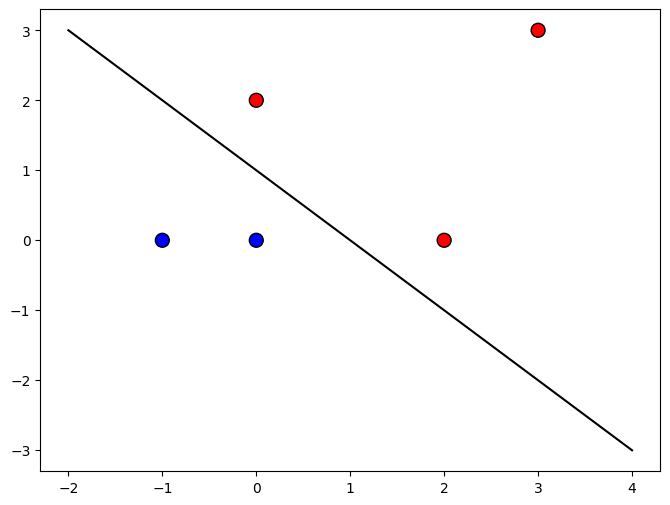

In [4]:
# Plot the primal decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')
x_vals = np.linspace(-2, 4, 100)
y_vals = -(w_primal[0] * x_vals + b_primal) / w_primal[1]
plt.plot(x_vals, y_vals, 'k-', label='Primal Decision Boundary')

In [5]:
### DUAL FORMULATION ###
# Minimize 1/2 sum_ij alpha_i alpha_j y_i y_j x_i^T x_j - sum_i alpha_i
K = np.dot(X, X.T)

P_dual = matrix(np.outer(y, y) * K, tc='d') 
q_dual = matrix(-np.ones(n_samples), tc='d') 


G_dual = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))), tc='d')
h_dual = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)), tc='d')

A_dual = matrix(y, (1, n_samples), 'd')
b_dual = matrix(0.0, tc='d')


solution = solvers.qp(P_dual, q_dual, G_dual, h_dual, A_dual, b_dual)
alphas = np.ravel(solution['x'])

support_vector_indices = np.where(alphas > 1e-5)[0]
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]

print("Dual solution: alphas =", alphas)
print("Support vector indices:", support_vector_indices)
print("Support vectors:", support_vectors)

     pcost       dcost       gap    pres   dres
 0: -1.8931e+00 -9.3827e+00  3e+01  2e+00  7e-16
 1: -1.1672e+00 -5.5563e+00  6e+00  2e-01  7e-16
 2: -8.3623e-01 -1.3991e+00  6e-01  1e-02  2e-15
 3: -9.9067e-01 -1.0498e+00  6e-02  1e-03  2e-16
 4: -9.9845e-01 -1.0024e+00  4e-03  2e-05  3e-17
 5: -9.9979e-01 -1.0002e+00  4e-04  9e-17  4e-16
 6: -9.9997e-01 -1.0000e+00  6e-05  1e-16  6e-17
 7: -1.0000e+00 -1.0000e+00  9e-06  2e-16  3e-16
 8: -1.0000e+00 -1.0000e+00  1e-06  1e-16  6e-16
 9: -1.0000e+00 -1.0000e+00  2e-07  2e-16  2e-16
Optimal solution found.
Dual solution: alphas = [4.99857298e-01 4.99857299e-01 3.85362052e-10 9.99714596e-01
 1.54171741e-09]
Support vector indices: [0 1 3]
Support vectors: [[2 0]
 [0 2]
 [0 0]]


Weight vector (w) from dual: [0.9997146 0.9997146]
Bias (b) from dual: -0.999429192394613


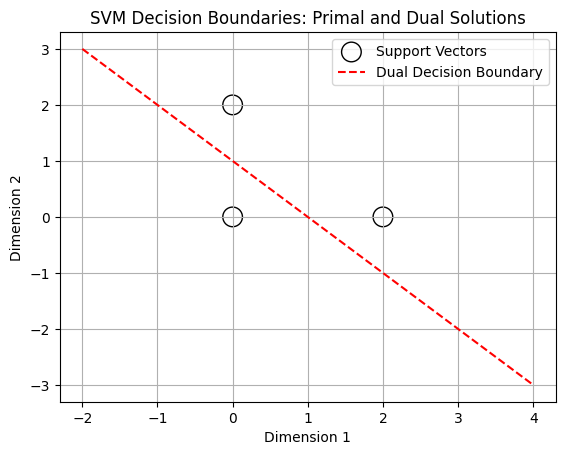

In [6]:
# Compute w from the dual solution
w_dual = np.sum(alphas[support_vector_indices].reshape(-1, 1) * support_vector_labels.reshape(-1, 1) * support_vectors, axis=0)
print("Weight vector (w) from dual:", w_dual)

# Compute b using one of the support vectors (e.g., the first one)
b_dual = support_vector_labels[0] - np.dot(w_dual, support_vectors[0])
print("Bias (b) from dual:", b_dual)

# Plot the support vectors and decision boundary
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot decision boundary using the weight vector and bias from dual
y_vals_dual = -(w_dual[0] * x_vals + b_dual) / w_dual[1]
plt.plot(x_vals, y_vals_dual, 'r--', label='Dual Decision Boundary')

# Finalize plot
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.title('SVM Decision Boundaries: Primal and Dual Solutions')
plt.show()